**Clustering avec Kmeans**

Les données à regrouper

In [4]:
import pandas as pd

df_employes=pd.DataFrame([[1200,25],
                 [1300,27],
                 [1100,27],
                 [2500,49],
                 [2400,47],
                 [2600,45]], 
                 columns=['salaire','age'])

Apprentissage avec Kmeans

[[2500.           47.        ]
 [1200.           26.33333333]]


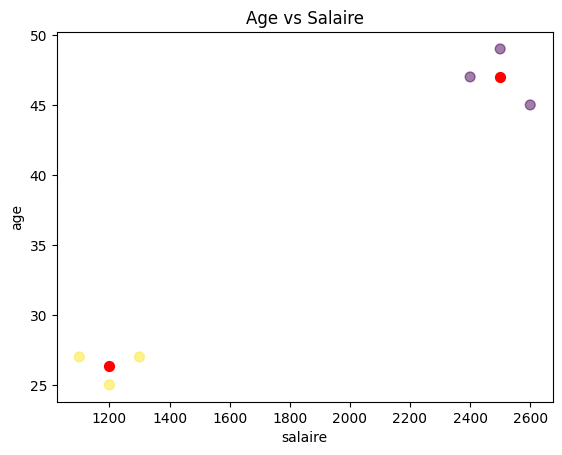

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_employes)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_employes['salaire'], df_employes['age'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("salaire")
plt.ylabel("age")
plt.title("Age vs Salaire")
plt.show()

Test avec donénes de test

In [6]:
employe_new1=pd.DataFrame([[1300.67,28]], columns=['salaire','age'])
employe_new1

employe_new2=pd.DataFrame([[1900.67,40]], columns=['salaire','age'])
employe_new2

,salaire,age
0,1900.67,40


In [7]:
labels=kmeans.predict(df_employes)
labels

array([1, 1, 1, 0, 0, 0])

In [8]:
label_new1=kmeans.predict(employe_new1)
label_new1

label_new2=kmeans.predict(employe_new2)
label_new2

array([0])

**Clustering des données réelles**

In [9]:
#when you're working on google colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [10]:
# when you're working on google colab
#data_path='/content/drive/MyDrive/Colab Notebooks/irm2/employes.csv'

# when you're working on your computer
data_path='./employes.csv'

Charger les données CSV employes.csv à partir de Google Drive

In [11]:
df_employes = pd.read_csv(data_path, index_col=0, header=0)
df_employes

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


Transformer les données de format brute en format numérique

In [12]:
df_=df_employes.copy() # _ means copy of df_


In [13]:
# fill missing values with the mean column values (NaN)
df_.fillna({'salaire': df_employes.salaire.mean(), 
                    'prime': df_employes.prime.mean()}, inplace=True)

df_

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,20/10/2018
Sonia,2800.786000,400.876000,marie,30/11/2005
Rahma,2192.082091,130.987000,celibataire,04/02/2017
Salma,2500.876000,340.600000,marie,03/02/2010
Ahmed,3100.760000,257.165889,marie,09/09/2004
Saleh,1300.876000,150.900000,celibataire,01/01/2017
Ameni,1100.660000,130.870000,celibataire,11/05/2019
Mehdi,3000.760000,257.165889,marie,07/07/2000
Salem,1505.760000,159.700000,celibataire,21/11/2017


In [14]:
# convert date de recrutement to datetime using to_datetime function of pandas
df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])
df_['date recrutement']

C:\Users\abbas\AppData\Local\Temp\ipykernel_12972\3328830615.py:2: UserWarning: Parsing '20/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])
C:\Users\abbas\AppData\Local\Temp\ipykernel_12972\3328830615.py:2: UserWarning: Parsing '30/11/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])
C:\Users\abbas\AppData\Local\Temp\ipykernel_12972\3328830615.py:2: UserWarning: Parsing '21/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])
C:\Users\abbas\AppData\Local\Temp\ipykernel_12972\3328830615.py:2: UserWarning: Parsing '19/02/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsi

nom
Ali       2018-10-20
Sonia     2005-11-30
Rahma     2017-04-02
Salma     2010-03-02
Ahmed     2004-09-09
Saleh     2017-01-01
Ameni     2019-11-05
Mehdi     2000-07-07
Salem     2017-11-21
Sameh     1999-02-19
Wajdi     2015-11-27
Moufida   1991-09-12
Name: date recrutement, dtype: datetime64[ns]

In [15]:
from datetime import datetime

df_['date recrutement'].apply(lambda date: datetime.now().year - date.year)

df_['anciennete'] = df_['date recrutement'].apply(lambda date: datetime.now().year - date.year)
df_

,salaire,prime,etat civil,date recrutement,anciennete
nom,,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20,4
Sonia,2800.786000,400.876000,marie,2005-11-30,17
Rahma,2192.082091,130.987000,celibataire,2017-04-02,5
Salma,2500.876000,340.600000,marie,2010-03-02,12
Ahmed,3100.760000,257.165889,marie,2004-09-09,18
Saleh,1300.876000,150.900000,celibataire,2017-01-01,5
Ameni,1100.660000,130.870000,celibataire,2019-11-05,3
Mehdi,3000.760000,257.165889,marie,2000-07-07,22
Salem,1505.760000,159.700000,celibataire,2017-11-21,5


In [16]:
df_.drop('date recrutement', axis=1, errors='ignore',inplace=True)
df_

,salaire,prime,etat civil,anciennete
nom,,,,
Ali,1200.675000,100.560000,celibataire,4
Sonia,2800.786000,400.876000,marie,17
Rahma,2192.082091,130.987000,celibataire,5
Salma,2500.876000,340.600000,marie,12
Ahmed,3100.760000,257.165889,marie,18
Saleh,1300.876000,150.900000,celibataire,5
Ameni,1100.660000,130.870000,celibataire,3
Mehdi,3000.760000,257.165889,marie,22
Salem,1505.760000,159.700000,celibataire,5


In [17]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoding: convert categorical data to numerical data

ohe=OneHotEncoder().fit(df_[['etat civil']])

ohe.categories_

[array(['celibataire', 'marie'], dtype=object)]

In [18]:
etat_civil_sparse = ohe.transform(df_[['etat civil']])
etat_civil = etat_civil_sparse.toarray()
etat_civil

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [19]:
df_etat_civile = pd.DataFrame(etat_civil, index = df_.index, columns = ['etat civile celibataire', 'etat civile marie'])
df_etat_civile

,etat civile celibataire,etat civile marie
nom,,
Ali,1.0,0.0
Sonia,0.0,1.0
Rahma,1.0,0.0
Salma,0.0,1.0
Ahmed,0.0,1.0
Saleh,1.0,0.0
Ameni,1.0,0.0
Mehdi,0.0,1.0
Salem,1.0,0.0


In [20]:
df_= pd.concat([df_, df_etat_civile], axis=1)
df_

,salaire,prime,etat civil,anciennete,etat civile celibataire,etat civile marie
nom,,,,,,
Ali,1200.675000,100.560000,celibataire,4,1.0,0.0
Sonia,2800.786000,400.876000,marie,17,0.0,1.0
Rahma,2192.082091,130.987000,celibataire,5,1.0,0.0
Salma,2500.876000,340.600000,marie,12,0.0,1.0
Ahmed,3100.760000,257.165889,marie,18,0.0,1.0
Saleh,1300.876000,150.900000,celibataire,5,1.0,0.0
Ameni,1100.660000,130.870000,celibataire,3,1.0,0.0
Mehdi,3000.760000,257.165889,marie,22,0.0,1.0
Salem,1505.760000,159.700000,celibataire,5,1.0,0.0


In [21]:
df_.drop('etat civil', axis=1, errors='ignore',inplace=True)
df_

,salaire,prime,anciennete,etat civile celibataire,etat civile marie
nom,,,,,
Ali,1200.675000,100.560000,4,1.0,0.0
Sonia,2800.786000,400.876000,17,0.0,1.0
Rahma,2192.082091,130.987000,5,1.0,0.0
Salma,2500.876000,340.600000,12,0.0,1.0
Ahmed,3100.760000,257.165889,18,0.0,1.0
Saleh,1300.876000,150.900000,5,1.0,0.0
Ameni,1100.660000,130.870000,3,1.0,0.0
Mehdi,3000.760000,257.165889,22,0.0,1.0
Salem,1505.760000,159.700000,5,1.0,0.0


**Post traintement des données numériques**

Normaliser les données

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df_)
X_ss=ss.transform(df_)
X_ss

array([[-1.1511497 , -1.26411237, -0.97166562,  1.        , -1.        ],
       [ 0.70678264,  1.1600185 ,  0.48583281, -1.        ,  1.        ],
       [ 0.        , -1.01850764, -0.85955036,  1.        , -1.        ],
       [ 0.358549  ,  0.67347462, -0.07474351, -1.        ,  1.        ],
       [ 1.0550906 ,  0.        ,  0.59794807, -1.        ,  1.        ],
       [-1.0348036 , -0.85777122, -0.85955036,  1.        , -1.        ],
       [-1.26727984, -1.01945206, -1.08378088,  1.        , -1.        ],
       [ 0.93897789,  0.        ,  1.04640913, -1.        ,  1.        ],
       [-0.79690722, -0.7867382 , -0.85955036,  1.        , -1.        ],
       [ 0.59014045,  1.15294749,  1.15852439, -1.        ,  1.        ],
       [-1.15079556,  0.        , -0.63531983,  1.        , -1.        ],
       [ 1.75139534,  1.96014087,  2.05544651, -1.        ,  1.        ]])

Réduire les dimensions des données

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_ss)
X_pca = pca.transform(X_ss)
X_pca

array([[-2.40254573, -0.21260843],
       [ 1.94104291,  0.13336802],
       [-1.73359756, -0.29367583],
       [ 1.32591667, -0.29059585],
       [ 1.65300564, -0.84805555],
       [-2.12706805,  0.10410078],
       [-2.40068748, -0.01507993],
       [ 1.80315582, -0.71309448],
       [-1.99062368,  0.09796294],
       [ 2.18893613,  0.31516948],
       [-1.71255885,  0.86438558],
       [ 3.45502417,  0.85812327]])

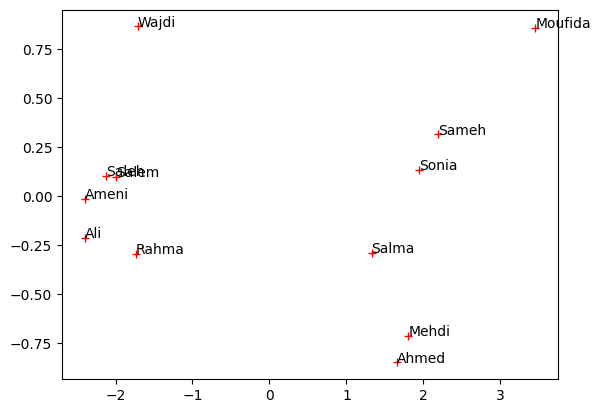

In [24]:
import matplotlib.pyplot as plt

plt.plot(X_pca[:,0],X_pca[:,1],'r+')

for nom, x, y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

**Regrouper les données clusters avec Kmeans**

Apprentissage

In [25]:
# regrouper les données clusters avec Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X_pca)

In [26]:
df_employes.iloc[:4,:]

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010


Prédire les labels des clusters

In [27]:
labels= kmeans.predict(X_pca)
labels

array([1, 3, 1, 0, 0, 1, 1, 0, 1, 3, 1, 2])

Déterminer les clusters

In [28]:
cluster_0 = X_pca[labels==0,:]
cluster_1 = X_pca[labels==1,:]
cluster_2 = X_pca[labels==2,:]
cluster_3 = X_pca[labels==3,:]

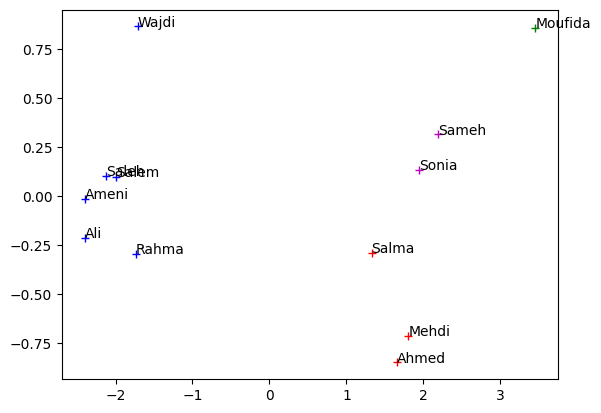

In [29]:
import matplotlib.pyplot as plt

plt.plot(cluster_0[:,0],cluster_0[:,1],'r+', label='Cluster 0')
plt.plot(cluster_1[:,0],cluster_1[:,1],'b+', label='Cluster 1')
plt.plot(cluster_2[:,0],cluster_2[:,1],'g+', label='Cluster 2')
plt.plot(cluster_3[:,0],cluster_3[:,1],'m+', label='Cluster 3')

for nom, x, y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

**projection d'un nouveau employee sur le plan 2D**

In [32]:
# add new employe to datafram
import pandas as pd
df_new=pd.DataFrame([[3500.400,600,'marie','19/10/1990']],index=['Moufid'], columns=df_employes.columns)

df_new

,salaire,prime,etat civil,date recrutement
Moufid,3500.4,600,marie,19/10/1990


In [33]:
df_new_ = df_employes.copy()
df_new.fillna({'salaire': df_employes['salaire'].mean(),
                'prime': df_employes['prime'].mean() }, inplace=True)
df_new

,salaire,prime,etat civil,date recrutement
Moufid,3500.4,600,marie,19/10/1990


In [35]:
df_new['date recrutement'] = pd.to_datetime(df_new['date recrutement'])
df_new['date recrutement']

C:\Users\abbas\AppData\Local\Temp\ipykernel_12972\3913774225.py:1: UserWarning: Parsing '19/10/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_new['date recrutement'] = pd.to_datetime(df_new['date recrutement'])


Moufid   1990-10-19
Name: date recrutement, dtype: datetime64[ns]

In [36]:
df_new['date recrutement'].apply(lambda date: datetime.now().year - date.year)

df_new['anciennete'] = df_new['date recrutement'].apply(lambda date: datetime.now().year - date.year)
df_new

,salaire,prime,etat civil,date recrutement,anciennete
Moufid,3500.4,600,marie,1990-10-19,32


In [37]:
df_new.drop('date recrutement', axis=1, errors='ignore',inplace=True)
df_new

,salaire,prime,etat civil,anciennete
Moufid,3500.4,600,marie,32


In [38]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoding: convert categorical data to numerical data

ohe_new=OneHotEncoder().fit(df_new[['etat civil']])

ohe_new.categories_

[array(['marie'], dtype=object)]

In [39]:
etat_civil_sparse_new = ohe_new.transform(df_new[['etat civil']])
etat_civil_new = etat_civil_sparse_new.toarray()
etat_civil_new

array([[1.]])

In [42]:
df_etat_civile_new= pd.DataFrame(etat_civil_new, index = df_new.index, columns = ['etat civile celibataire', 'etat civile marie'])
df_etat_civile_new

ValueError: Shape of passed values is (1, 1), indices imply (1, 2)

In [ ]:
df_new= pd.concat([df_new, df_etat_civile_new], axis=1)
df_new

In [ ]:
df_new.drop('etat civil', axis=1, errors='ignore',inplace=True)
df_new

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_new=StandardScaler()
ss_new.fit(df_new)
X_ss_new=ss_new.transform(df_new)
X_ss_new

In [ ]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=2)
pca_new.fit(X_ss_new)
X_pca_new = pca_new.transform(X_ss_new)
X_pca_new

Visualiser les données sur un plan 2D colorées selon leurs appartenances aux clusters

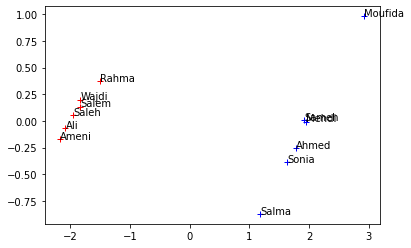

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cluster_0[:,0],cluster_0[:,1],'r+', label='Cluster 0')
plt.plot(cluster_1[:,0],cluster_1[:,1],'b+', label='Cluster 1')

for nom, x, y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")